# (InProgress) Exploratory Data Analysis - Package.json in GitHub repo

In [762]:
import pandas as pd
import matplotlib.pyplot as plt

from ast import literal_eval

from collections import OrderedDict 
from collections import Counter



In [763]:
%matplotlib inline


## Load data

Let's create a dataframe for 
1. Data of packages information of GitHub repositories that define at least one of the interested JS Testing framework in its package.json (data/github_package_deps_June_2019.csv)
2. Data of GitHub repositories listed in (1) above (data/github_repo_for_package_deps_June_2019.csv)

In [764]:
df_dep = pd.read_csv('data/github_package_deps_June_2019.csv')
df_repo = pd.read_csv('data/github_repo_for_package_deps_June_2019.csv')

Let's clean up the 'df_dep' dataframe first by converting the 'package_dep' column to a list of package names

In [765]:
# Convert the 'package_dep' column to a list of string
df_dep['package_dep'] = df_dep['package_dep'].apply(lambda x: x.split(','))

In [766]:
df_dep.head()

,repo_name,package_dep,mocha,jest,jasmine,qunit,funcunit,cypress,puppeteer,chai,sinon
0,0-mb/pg-lb,"[pg, mocha]",True,False,False,False,False,False,False,False,False
1,0000-bigtree/binary-protocol,"[bluebird, expect.js, istanbul, jshint, mocha,...",True,False,False,False,False,False,False,False,False
2,0000000009/selenium-standalone,"[async, commander, debug, lodash, minimist, mk...",True,False,False,False,False,False,False,False,False
3,001szymon/atom,"[async, atom-keymap, babel-core, bootstrap, cl...",False,False,True,False,False,False,False,False,False
4,001szymon/phonegap-app-desktop,"[grunt, grunt-cli, grunt-contrib-copy, grunt-c...",False,False,True,False,False,False,False,False,False


Then, clean up the 'df_repo' dataframe by 
1. Remove unused columns ('node_id') and rows with na
2. Convert 'stargazers_count' and 'forks_count' columns to int
3. Converting the 'languages' column which contains a string of list to an actual a list
4. Convert 'createdAt' and 'updatedAt' columns to a datetime column

In [767]:
# Drop unused columns first
df_repo = df_repo.drop(columns=['node_id'])

# Drop rows with NA
df_repo = df_repo.dropna()

In [768]:
df_repo.shape

(203444, 9)

In [769]:
# Convert 'stargazers_count' and 'forks_count' columns to int
col_names = ['stargazers_count', 'forks_count']
df_repo[col_names] = df_repo[col_names].astype(int)

In [770]:
# Converting the 'languages' column which contains a string of list to an actual a list
df_repo['languages'] = df_repo['languages'].apply(literal_eval)

In [771]:
# Additionally, convert 'createdAt' and 'updatedAt' columns to a datetime column
cols_datetime = ['createdAt', 'updatedAt']
for col_name in cols_datetime:
    df_repo[col_name] = pd.to_datetime(df_repo[col_name])

In [772]:
df_repo.head()

,repo_name,createdAt,updatedAt,stargazers_count,releases_count,issues_count,forks_count,primaryLanguage,languages
0,01alchemist/TurboScript,2016-12-14 12:27:18+00:00,2019-06-24 11:10:25+00:00,472,2,85,32,JavaScript,"[TypeScript, JavaScript, HTML, Shell, Batchfil..."
1,0067ED/vue-block,2017-07-03 14:36:54+00:00,2019-06-12 20:07:25+00:00,38,0,1,4,JavaScript,"[JavaScript, HTML, Vue]"
2,01alchemist/x-ray.js,2016-04-21 09:06:24+00:00,2019-04-02 20:58:18+00:00,15,0,0,6,JavaScript,"[JavaScript, TypeScript, HTML]"
3,007design/gulp-prefix,2014-04-22 20:54:02+00:00,2017-03-05 09:42:21+00:00,7,0,5,4,JavaScript,"[JavaScript, HTML]"
4,01alchemist/x-ray-kernel,2016-09-08 12:09:44+00:00,2018-10-18 07:33:47+00:00,5,0,0,5,C++,"[C++, Makefile, Batchfile, Shell, TypeScript, ..."


In [773]:
df_repo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203444 entries, 0 to 213663
Data columns (total 9 columns):
repo_name           203444 non-null object
createdAt           203444 non-null datetime64[ns, UTC]
updatedAt           203444 non-null datetime64[ns, UTC]
stargazers_count    203444 non-null int64
releases_count      203444 non-null int64
issues_count        203444 non-null int64
forks_count         203444 non-null int64
primaryLanguage     203444 non-null object
languages           203444 non-null object
dtypes: datetime64[ns, UTC](2), int64(4), object(3)
memory usage: 15.5+ MB


Now, create a combined dataframe for those with repo information

In [774]:
df_combined = df_repo.merge(df_dep, on='repo_name')

In [775]:
df_combined.head()

,repo_name,createdAt,updatedAt,stargazers_count,releases_count,issues_count,forks_count,primaryLanguage,languages,package_dep,mocha,jest,jasmine,qunit,funcunit,cypress,puppeteer,chai,sinon
0,01alchemist/TurboScript,2016-12-14 12:27:18+00:00,2019-06-24 11:10:25+00:00,472,2,85,32,JavaScript,"[TypeScript, JavaScript, HTML, Shell, Batchfil...","[binaryen, @types/debug, @types/fs-extra, @typ...",False,True,False,False,False,False,False,False,False
1,0067ED/vue-block,2017-07-03 14:36:54+00:00,2019-06-12 20:07:25+00:00,38,0,1,4,JavaScript,"[JavaScript, HTML, Vue]","[autoprefixer, babel-core, babel-eslint, babel...",True,False,False,False,False,False,False,True,True
2,01alchemist/x-ray.js,2016-04-21 09:06:24+00:00,2019-04-02 20:58:18+00:00,15,0,0,6,JavaScript,"[JavaScript, TypeScript, HTML]","[xdata, @types/jest, @types/three, bin-loader,...",False,True,False,False,False,False,False,False,False
3,007design/gulp-prefix,2014-04-22 20:54:02+00:00,2017-03-05 09:42:21+00:00,7,0,5,4,JavaScript,"[JavaScript, HTML]","[through2, url, trumpet, concat-stream, url-jo...",False,False,True,False,False,False,False,False,False
4,01alchemist/x-ray-kernel,2016-09-08 12:09:44+00:00,2018-10-18 07:33:47+00:00,5,0,0,5,C++,"[C++, Makefile, Batchfile, Shell, TypeScript, ...","[three, @types/jasmine, concurrently, jasmine-...",False,False,True,False,False,False,False,False,False


In [776]:
df_combined.describe()

,stargazers_count,releases_count,issues_count,forks_count
count,202705.000000,202705.000000,202705.000000,202705.000000
mean,74.425421,0.756824,11.783059,12.685316
std,1269.378453,12.487368,158.359947,250.923332
min,0.000000,-1.000000,0.000000,0.000000
25%,0.000000,-1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,1.000000,1.000000
max,303554.000000,3467.000000,18589.000000,65869.000000


Let's take a look at a ratio of each JS Testing Framework

In [777]:
cols_testing_fw = [
    'qunit',
    'mocha',
    'jest',
    'jasmine',
    'funcunit',        
    'puppeteer',
    'cypress',
    'chai',
    'sinon'
]

df_num_fw = df_combined[cols_testing_fw].sum().sort_values(ascending=False)

In [778]:
df_num_fw

mocha        124375
chai          64033
jasmine       49151
sinon         33064
qunit         21629
jest          14568
puppeteer       706
cypress         242
funcunit         22
dtype: int64

In [779]:
(df_num_fw / df_num_fw.sum()) * 100

mocha        40.409045
chai         20.804120
jasmine      15.969005
sinon        10.742389
qunit         7.027194
jest          4.733097
puppeteer     0.229377
cypress       0.078625
funcunit      0.007148
dtype: float64

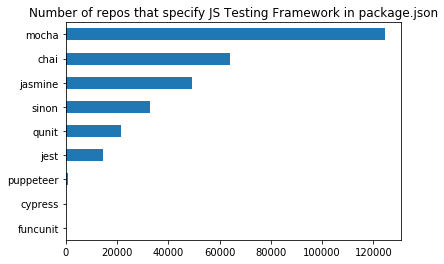

In [780]:
df_num_fw.plot.barh();
plt.gca().invert_yaxis()
plt.title('Number of repos that specify JS Testing Framework in package.json');

## Exploratory Data Analysis

## When did those github repos created?

/Users/nongnoochr/anaconda3/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


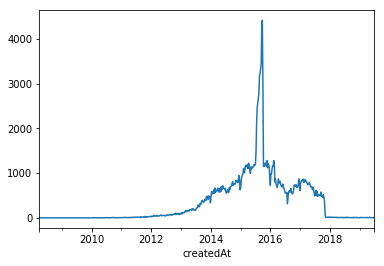

In [781]:
df_combined.groupby(pd.Grouper(key='createdAt', freq='W'))['repo_name'].count().plot();


What is that spike in 2015! Let's take a look at data in that period to find out what is going on.

In [782]:
# df_combined = df_combined[df_combined['stargazers_count'] > 5]
start_date = '07-01-2015'
end_date = '11-01-2015'
df_2015_suspect = df_combined[(df_combined['createdAt'] >= start_date) & ((df_combined['createdAt'] < end_date))]


In [783]:
df_2015_suspect.groupby(pd.Grouper(key='createdAt', freq='W'))['repo_name'].count()

createdAt
2015-07-05 00:00:00+00:00     835
2015-07-12 00:00:00+00:00    1504
2015-07-19 00:00:00+00:00    2122
2015-07-26 00:00:00+00:00    2457
2015-08-02 00:00:00+00:00    2577
2015-08-09 00:00:00+00:00    2668
2015-08-16 00:00:00+00:00    2802
2015-08-23 00:00:00+00:00    3171
2015-08-30 00:00:00+00:00    3233
2015-09-06 00:00:00+00:00    3340
2015-09-13 00:00:00+00:00    3437
2015-09-20 00:00:00+00:00    4295
2015-09-27 00:00:00+00:00    4414
2015-10-04 00:00:00+00:00    2953
2015-10-11 00:00:00+00:00    1151
2015-10-18 00:00:00+00:00    1171
2015-10-25 00:00:00+00:00    1158
2015-11-01 00:00:00+00:00    1102
Freq: W-SUN, Name: repo_name, dtype: int64

Looks like some thing is going on between a week of 2015-07-19 to 2015-10-11. Let's zoom into this datarange

In [784]:
df_2015_suspect = df_2015_suspect[(df_2015_suspect['createdAt'] >= '07-15-2015') & ((df_combined['createdAt'] < '10-15-2015'))]


/Users/nongnoochr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [785]:
df_2015_suspect.shape

(38648, 19)

In [786]:
df_2015_suspect.describe()

,stargazers_count,releases_count,issues_count,forks_count
count,38648.000000,38648.000000,38648.000000,38648.000000
mean,23.014697,-0.314324,3.865194,3.650331
std,538.393438,6.592202,78.798977,81.670859
min,0.000000,-1.000000,0.000000,0.000000
25%,0.000000,-1.000000,0.000000,0.000000
50%,0.000000,-1.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,78895.000000,968.000000,8947.000000,10982.000000


More than half of the data in this range have **releases_count == -1**! (To be precise, around 70% of repos created during this time range have releases_count == -1. See the code cell below)

I took a look at a few of those repos and all of them are **forked repos!** 
Something might have happened during that time but I could not find any solid incidense or events that might have introduced this behavior online.

In [787]:
# Number of repos with releases_count == -1 during the suspect period
sum(df_2015_suspect['releases_count'] < 0)

26913

In [788]:
# Ration of repos with releases_count == -1 during the suspect period
sum(df_2015_suspect['releases_count'] < 0)/df_2015_suspect.shape[0]

0.6963620368453737

Since the forked repos will not give us much insights, we will drop repos with where "releases_count == -1" from the original combined dataset and inspect the createdOn of the remain repos

In [789]:
df_combined_clean = df_combined[df_combined['releases_count'] > 0]

After droping those repos, we are left with only 19863 repos which is **only around 10%** of the original dataset!

In [790]:
df_combined_clean.shape

(19863, 19)

In [791]:
df_combined.shape

(202705, 19)

In [792]:
df_combined_clean.shape[0] / df_combined.shape[0]

0.09798968945018623

Let's plot a line chart for the createdAt data again. 

Now we get a smoother plot **EXCEPT** that there is a big drop of a number of projects around the end of 2017.

/Users/nongnoochr/anaconda3/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


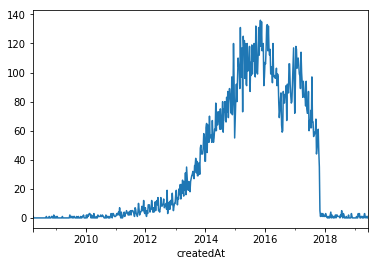

In [793]:
df_combined_clean.groupby(pd.Grouper(key='createdAt', freq='W'))['repo_name'].count().plot();


However, if we look at the updatedAt data, most of those repos have recently been updated in 2019.

Is GitHub's recent annoucement in 2019 to get [unlimited free private repos](https://techcrunch.com/2019/01/07/github-free-users-now-get-unlimited-private-repositories/) contribute to a drop of a number of public repos created recently? (I even moved a few of my repos to private after this new year resolution was rolled out)

Nevertheless, since most of the remaining repos are active (which is a good thing for our analysis) and we have a good number of repos with a varity of testing frameworks to analyze, I will proceed with this data.

/Users/nongnoochr/anaconda3/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


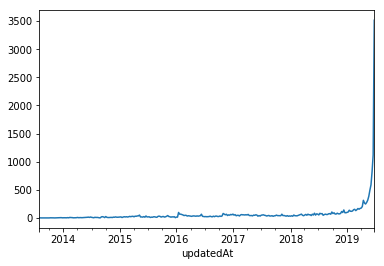

In [794]:
# Inspect the updatedAt data
df_updatedAt = df_combined_clean.groupby(pd.Grouper(key='updatedAt', freq='W'))['repo_name'].count()
df_updatedAt.plot();

Let's zoom into updatedAt data > '01-01-2019'. We can see that most repos in this dataset have recently been updated


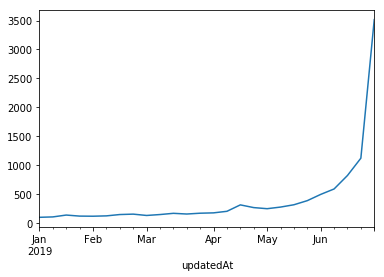

In [795]:
df_updatedAt[df_updatedAt.index > '01-01-2019'].plot();

In [796]:
df_updatedAt[df_updatedAt.index > '01-01-2019']

updatedAt
2019-01-06 00:00:00+00:00      98
2019-01-13 00:00:00+00:00     105
2019-01-20 00:00:00+00:00     137
2019-01-27 00:00:00+00:00     119
2019-02-03 00:00:00+00:00     117
2019-02-10 00:00:00+00:00     123
2019-02-17 00:00:00+00:00     146
2019-02-24 00:00:00+00:00     153
2019-03-03 00:00:00+00:00     130
2019-03-10 00:00:00+00:00     146
2019-03-17 00:00:00+00:00     167
2019-03-24 00:00:00+00:00     155
2019-03-31 00:00:00+00:00     169
2019-04-07 00:00:00+00:00     175
2019-04-14 00:00:00+00:00     202
2019-04-21 00:00:00+00:00     313
2019-04-28 00:00:00+00:00     266
2019-05-05 00:00:00+00:00     247
2019-05-12 00:00:00+00:00     275
2019-05-19 00:00:00+00:00     315
2019-05-26 00:00:00+00:00     386
2019-06-02 00:00:00+00:00     494
2019-06-09 00:00:00+00:00     588
2019-06-16 00:00:00+00:00     821
2019-06-23 00:00:00+00:00    1120
2019-06-30 00:00:00+00:00    3515
Freq: W-SUN, Name: repo_name, dtype: int64

To reflect the current user behavior, let's analyze only repos that have been updated in the past one year (From June 2018 - now which is late June 29th 2019)

Now, let's take a look at how many of those repos use each of the interested JS Testing Framework

In [797]:
df_combined_final = df_combined_clean[(df_combined_clean['updatedAt'] >= '06-01-2018')]


In [798]:
df_combined_final.shape

(12815, 19)

In [799]:
df_combined_final.describe()

,stargazers_count,releases_count,issues_count,forks_count
count,12815.000000,12815.000000,12815.000000,12815.000000
mean,579.800000,14.786734,114.933437,99.854155
std,3354.380875,47.099407,562.726475,820.901407
min,0.000000,1.000000,0.000000,0.000000
25%,5.000000,2.000000,2.000000,1.000000
50%,24.000000,6.000000,12.000000,7.000000
75%,146.000000,15.000000,51.500000,33.000000
max,142451.000000,3467.000000,18589.000000,65869.000000


Let's also look at a distribution of each JS Testing Framework of this dataset

In [800]:
cols_testing_fw = [
    'qunit',
    'mocha',
    'jest',
    'jasmine',
    'funcunit',        
    'puppeteer',
    'cypress',
    'chai',
    'sinon'
]

df_num_fw = df_combined_final[cols_testing_fw].sum().sort_values(ascending=False)

In [801]:
df_num_fw

mocha        7687
chai         4525
sinon        2572
jasmine      2247
jest         2131
qunit         894
puppeteer     203
cypress        81
funcunit        1
dtype: int64

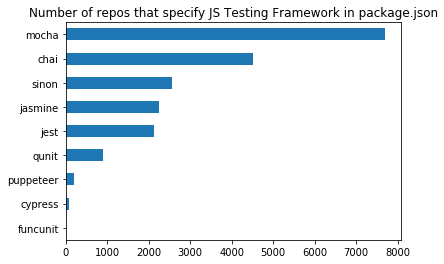

In [802]:
df_num_fw.plot.barh();
plt.gca().invert_yaxis()
plt.title('Number of repos that specify JS Testing Framework in package.json');

Let's find a ratio of a number of repositories that use each JS Testing Framework/Lib. 

Note that it is possible that the same repo list multiple frameworks in package.json, e.g. It is common to see mocha+chai in the same package.json. sinon is a mocking framework that can use with any testing framework, etc. 

In [803]:
(df_num_fw / df_combined_final.shape[0]) * 100

mocha        59.984393
chai         35.310183
sinon        20.070230
jasmine      17.534140
jest         16.628950
qunit         6.976200
puppeteer     1.584081
cypress       0.632072
funcunit      0.007803
dtype: float64

Before we move on with the analysis, let's save this final dataset so that we don't need to repeat the steps above again

In [804]:
df_combined_final.to_csv('data/github_package_deps_June_2018_to_June_2019.csv', index=False)

## What are the top github repos that uses each framework and what are common packages installed with it?

Create a dataframe containing repos that use each framework

In [805]:
col_subset = ['repo_name',
 'createdAt',
 'updatedAt',
 'stargazers_count',
 'releases_count',
 'issues_count',
 'forks_count',
 'primaryLanguage',
 'languages',
 'package_dep']

df_qunit = df_combined_final[df_combined_final['qunit']][col_subset]
df_mocha = df_combined_final[df_combined_final['mocha']][col_subset]
df_jest = df_combined_final[df_combined_final['jest']][col_subset]
df_jasmine = df_combined_final[df_combined_final['jasmine']][col_subset]

dict_df = OrderedDict()
dict_df['qunit'] = df_qunit
dict_df['mocha'] = df_mocha
dict_df['jest'] = df_jest
dict_df['jasmine'] = df_jasmine

Let's create a function that we will use to print out a summary of each framework

In [806]:
def print_framework_summary(dict_df, fw_name):
    print('****** Framework: {} ******'.format(fw_name))
    df = dict_df[fw_name]
    
    print('Number of repos: {}\n'.format(df.shape[0]))
    
    # Find the most common package dependencies
    # https://stackoverflow.com/questions/41007797/pandas-find-most-frequent-values-in-columns-of-lists
    sum_deps = sum(df['package_dep'], [])
    c_deps = Counter(sum_deps)
    
    # --- Top repos (in terms of stargazers_count) that use this framework
    print('Top repos that uses "{}":\n'.format(fw_name))
    
    df_temp_top_stargazers = df.sort_values(by=['stargazers_count'], ascending=False).iloc[0:20,:][['repo_name', 'stargazers_count', 'createdAt']].reset_index(drop=True)
    df_temp_top_stargazers['Age (years)'] = round(df_temp_top_stargazers['createdAt'].apply(lambda x:  (pd.Timestamp.utcnow() - x)).dt.days / 365, 1)
    df_temp_top_stargazers = df_temp_top_stargazers.drop(columns=['createdAt'])
    print(df_temp_top_stargazers)

    
    df_plot = df_temp_top_stargazers[['repo_name', 'stargazers_count']].reset_index(drop=True)    
    
    df_plot = df_plot.set_index('repo_name')
    df_plot.plot.barh()
    plt.gca().invert_yaxis()
    plt.title('Top repos that uses "{}"'.format(fw_name));
    print('\n')
    
    # --- Top common packages
    print('Top common packages:\n')
    
    top_deps =  c_deps.most_common(10)
    for cur_top_dep in top_deps:
        print('{}: {}'.format(cur_top_dep[0], cur_top_dep[1]))
        
    df_plot = pd.DataFrame(top_deps, columns=['package_name', 'count'])
    df_plot = df_plot.set_index('package_name')
    
    df_plot.plot.barh()
    plt.gca().invert_yaxis()
    plt.title('Number of common packages that listed with "{}"'.format(fw_name));
    
    return df, c_deps
    

### QUnit

****** Framework: qunit ******
Number of repos: 894

Top repos that uses "qunit":

                              repo_name  stargazers_count  Age (years)
0                        twbs/bootstrap            134291          7.9
1                       mrdoob/three.js             52682          9.3
2                     hakimel/reveal.js             47067          8.1
3                    impress/impress.js             34879          7.5
4                       select2/select2             23704          7.3
5                      emberjs/ember.js             21067          8.1
6                julianshapiro/velocity             16076          5.2
7                   js-cookie/js-cookie             13127          4.3
8      uxsolutions/bootstrap-datepicker             11627          7.3
9                     scottjehl/Respond             11510          8.4
10                    aFarkas/lazysizes             11474          4.7
11            DmitryBaranovskiy/raphael             10262        

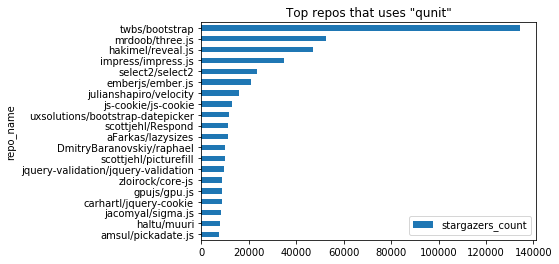

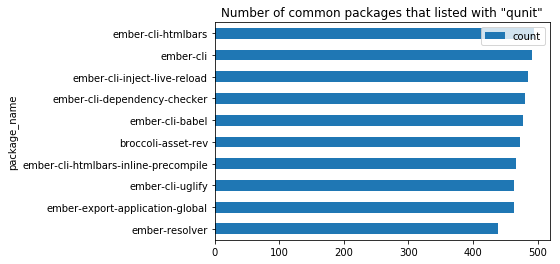

In [807]:
_, dep_qunit = print_framework_summary(dict_df, 'qunit');

In [808]:
dep_qunit.most_common(30)

[('ember-cli-htmlbars', 494),
 ('ember-cli', 492),
 ('ember-cli-inject-live-reload', 485),
 ('ember-cli-dependency-checker', 481),
 ('ember-cli-babel', 478),
 ('broccoli-asset-rev', 472),
 ('ember-cli-htmlbars-inline-precompile', 466),
 ('ember-cli-uglify', 464),
 ('ember-export-application-global', 463),
 ('ember-resolver', 439),
 ('loader.js', 439),
 ('ember-load-initializers', 436),
 ('ember-disable-prototype-extensions', 425),
 ('ember-cli-sri', 409),
 ('ember-source', 381),
 ('ember-cli-eslint', 351),
 ('ember-cli-qunit', 349),
 ('ember-try', 313),
 ('eslint-plugin-ember', 289),
 ('eslint-plugin-node', 280),
 ('grunt', 278),
 ('ember-source-channel-url', 249),
 ('ember-maybe-import-regenerator', 243),
 ('grunt-contrib-uglify', 235),
 ('grunt-contrib-qunit', 233),
 ('ember-ajax', 230),
 ('ember-cli-shims', 230),
 ('grunt-contrib-jshint', 201),
 ('ember-cli-release', 193),
 ('qunit-dom', 189)]

### Mocha

****** Framework: mocha ******
Number of repos: 7687

Top repos that uses "mocha":

                           repo_name  stargazers_count  Age (years)
0                          vuejs/vue            142451          5.9
1                  electron/electron             74662          6.2
2                        axios/axios             61335          4.9
3                          atom/atom             49149          7.4
4                 socketio/socket.io             46765          9.3
5                  expressjs/express             44454         10.0
6             h5bp/html5-boilerplate             43006          9.4
7                    ElemeFE/element             38822          2.8
8   thedaviddias/Front-End-Checklist             34831          1.7
9        google/material-design-lite             31303          4.5
10                       gulpjs/gulp             31287          6.0
11                    TryGhost/Ghost             30237          6.2
12             zurb/foundation-s

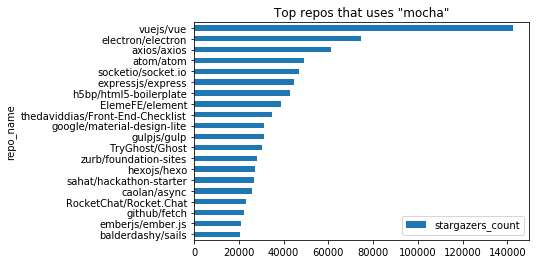

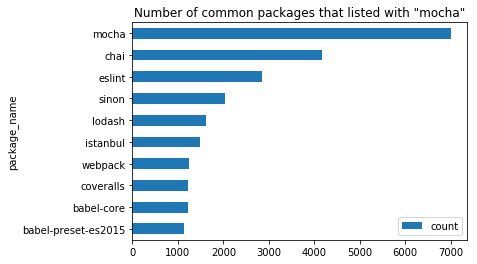

In [809]:
_, dep_mocha = print_framework_summary(dict_df, 'mocha');

In [810]:
dep_mocha.most_common(30)

[('mocha', 7015),
 ('chai', 4160),
 ('eslint', 2846),
 ('sinon', 2039),
 ('lodash', 1607),
 ('istanbul', 1493),
 ('webpack', 1242),
 ('coveralls', 1232),
 ('babel-core', 1218),
 ('babel-preset-es2015', 1135),
 ('babel-eslint', 1122),
 ('gulp', 1114),
 ('karma', 1039),
 ('express', 1021),
 ('nyc', 1015),
 ('eslint-plugin-import', 989),
 ('babel-loader', 975),
 ('rimraf', 961),
 ('typescript', 955),
 ('babel-cli', 916),
 ('request', 857),
 ('karma-mocha', 836),
 ('should', 805),
 ('grunt', 765),
 ('karma-chrome-launcher', 746),
 ('sinon-chai', 710),
 ('eslint-plugin-react', 682),
 ('@types/node', 642),
 ('async', 632),
 ('babel-register', 624)]

### Jest

****** Framework: jest ******
Number of repos: 2131

Top repos that uses "jest":

                              repo_name  stargazers_count  Age (years)
0                        facebook/react            131762          6.1
1                       webpack/webpack             49656          7.3
2                 ant-design/ant-design             48179          4.2
3                  typicode/json-server             41014          5.6
4                          zeit/next.js             38452          2.7
5          PanJiaChen/vue-element-admin             36011          2.2
6                       gatsbyjs/gatsby             35940          4.1
7                           babel/babel             33625          4.8
8                     prettier/prettier             32511          2.6
9   styled-components/styled-components             24541          2.9
10                         knsv/mermaid             23939          4.7
11  react-boilerplate/react-boilerplate             22822         

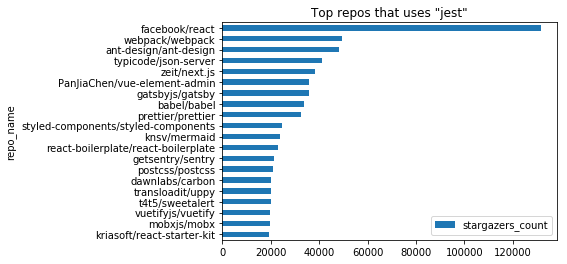

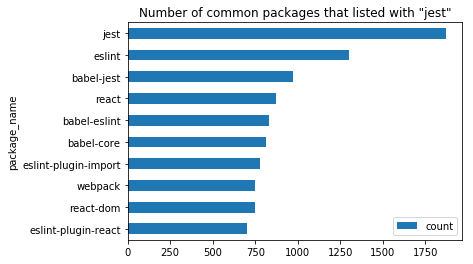

In [811]:
_, dep_jest = print_framework_summary(dict_df, 'jest');

In [812]:
dep_jest.most_common(30)

[('jest', 1874),
 ('eslint', 1301),
 ('babel-jest', 970),
 ('react', 871),
 ('babel-eslint', 832),
 ('babel-core', 813),
 ('eslint-plugin-import', 780),
 ('webpack', 750),
 ('react-dom', 746),
 ('eslint-plugin-react', 700),
 ('prettier', 691),
 ('babel-loader', 655),
 ('rimraf', 553),
 ('husky', 526),
 ('typescript', 519),
 ('react-test-renderer', 517),
 ('prop-types', 493),
 ('@babel/core', 487),
 ('enzyme', 484),
 ('css-loader', 446),
 ('@babel/preset-env', 435),
 ('eslint-plugin-jsx-a11y', 429),
 ('babel-cli', 426),
 ('@types/jest', 424),
 ('lint-staged', 409),
 ('lodash', 390),
 ('babel-preset-react', 388),
 ('style-loader', 380),
 ('babel-preset-env', 377),
 ('coveralls', 374)]

### Jasmine

****** Framework: jasmine ******
Number of repos: 2247

Top repos that uses "jasmine":

                repo_name  stargazers_count  Age (years)
0               vuejs/vue            142451          5.9
1          facebook/react            131762          6.1
2             axios/axios             61335          4.9
3               atom/atom             49149          7.4
4        chartjs/Chart.js             44132          6.3
5     Dogfalo/materialize             36020          4.8
6          adobe/brackets             29889          7.6
7          mozilla/pdf.js             27104          8.2
8        nylas/nylas-mail             24388          4.7
9           quilljs/quill             23195          6.9
10    angular/angular-cli             21846          4.1
11             vuejs/vuex             20813          4.0
12     angular/components             18289          3.5
13  chenglou/react-motion             16865          4.1
14            MrRio/jsPDF             16842          9.6


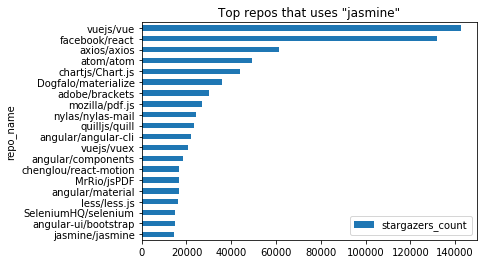

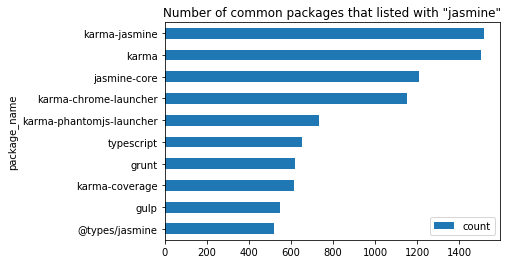

In [813]:
_, dep_jasmine = print_framework_summary(dict_df, 'jasmine');

In [814]:
dep_jasmine.most_common(30)

[('karma-jasmine', 1515),
 ('karma', 1502),
 ('jasmine-core', 1210),
 ('karma-chrome-launcher', 1153),
 ('karma-phantomjs-launcher', 732),
 ('typescript', 650),
 ('grunt', 621),
 ('karma-coverage', 614),
 ('gulp', 549),
 ('@types/jasmine', 517),
 ('tslint', 503),
 ('jasmine', 487),
 ('karma-firefox-launcher', 474),
 ('@types/node', 445),
 ('webpack', 440),
 ('grunt-contrib-uglify', 435),
 ('grunt-contrib-watch', 413),
 ('eslint', 409),
 ('rxjs', 386),
 ('grunt-contrib-jshint', 379),
 ('zone.js', 366),
 ('@angular/core', 364),
 ('@angular/compiler', 363),
 ('@angular/common', 359),
 ('@angular/platform-browser', 356),
 ('@angular/platform-browser-dynamic', 356),
 ('protractor', 348),
 ('core-js', 341),
 ('grunt-contrib-concat', 339),
 ('@angular/compiler-cli', 336)]